<a href="https://colab.research.google.com/github/deenaseban/machine-learning/blob/main/NLP_SMS%20" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
df=pd.read_csv('/content/SMS_train (1).csv',encoding='ISO-8859-1')
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [ ]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [ ]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [ ]:
df.shape

(957, 3)

<Axes: xlabel='Label', ylabel='count'>

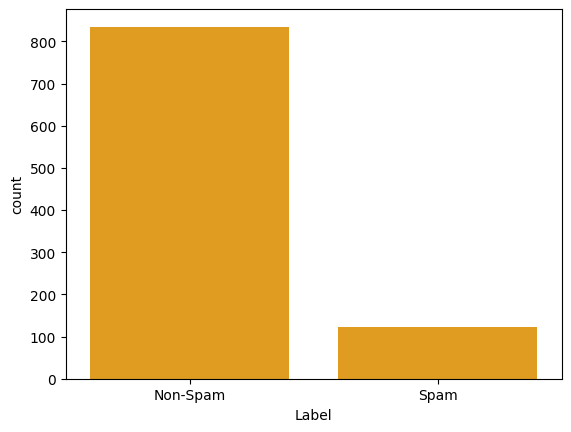

In [ ]:
sns.countplot(x='Label',data=df,color='orange')

In [ ]:
df['Label'].unique()

array(['Non-Spam', 'Spam'], dtype=object)

In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)

In [ ]:
df['Label']=df['Label'].map({'Non-Spam':1,'Spam':0})
df

,Message_body,Label
0,Rofl. Its true to its name,1
1,The guy did some bitching but I acted like i'd...,1
2,"Pity, * was in mood for that. So...any other s...",1
3,Will ü b going to esplanade fr home?,1
4,This is the 2nd time we have tried 2 contact u...,0
...,...,...
952,hows my favourite person today? r u workin har...,1
953,How much you got for cleaning,1
954,Sorry da. I gone mad so many pending works wha...,1
955,Wat time ü finish?,1


In [ ]:
df.dtypes

Message_body    object
Label            int64
dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
text=df.Message_body
text

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today? r u workin har...
953                        How much you got for cleaning
954    Sorry da. I gone mad so many pending works wha...
955                                   Wat time ü finish?
956                      Just glad to be talking to you.
Name: Message_body, Length: 957, dtype: object

In [ ]:
# Tokenization
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
text=text.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
text

0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today ? r u workin ha...
953                        How much you got for cleaning
954    Sorry da . I gone mad so many pending works wh...
955                                  Wat time ü finish ?
956                     Just glad to be talking to you .
Name: Message_body, Length: 957, dtype: object

In [ ]:
# To remove special character
text=text.str.replace('[^a-zA-Z0-9]+',' ')
text

<ipython-input-85-9f0534ca18e9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  text=text.str.replace('[^a-zA-Z0-9]+',' ')


0                              Rofl Its true to its name
1      The guy did some bitching but I acted like i d...
2      Pity was in mood for that So any other suggest...
3                     Will b going to esplanade fr home 
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today r u workin hard...
953                        How much you got for cleaning
954    Sorry da I gone mad so many pending works what...
955                                     Wat time finish 
956                      Just glad to be talking to you 
Name: Message_body, Length: 957, dtype: object

In [ ]:
# To remove words of length<3
from nltk.tokenize import word_tokenize
text=text.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
text

0                                 Rofl Its true its name
1      The guy did some bitching but acted like inter...
2           Pity was mood for that any other suggestions
3                              Will going esplanade home
4      This the 2nd time have tried contact have won ...
                             ...                        
952    hows favourite person today workin hard couldn...
953                        How much you got for cleaning
954               Sorry gone mad many pending works what
955                                      Wat time finish
956                                Just glad talking you
Name: Message_body, Length: 957, dtype: object

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')
text=text.apply(lambda x:[ss.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
text=text.apply(lambda x:' '.join([i for i in tk.tokenize(x) if  i not in sw]))

In [ ]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(text)
train_data.shape

(957, 2534)

In [ ]:
x_train=train_data
y_train=df['Label'].values
x_train.ndim

2

In [ ]:
df1=pd.read_csv('/content/SMS_test (2).csv',encoding='ISO-8859-1')
df.head()

,Message_body,Label
0,Rofl. Its true to its name,1
1,The guy did some bitching but I acted like i'd...,1
2,"Pity, * was in mood for that. So...any other s...",1
3,Will ü b going to esplanade fr home?,1
4,This is the 2nd time we have tried 2 contact u...,0


In [ ]:
df1.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [ ]:
df1.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [ ]:
df1.drop(['S. No.'],axis=1,inplace=True)

In [ ]:
df1['Label']=df1['Label'].map({'Non-Spam':1,'Spam':0})
df1

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",0
1,"Loan for any purpose £500 - £75,000. Homeowner...",0
2,Congrats! Nokia 3650 video camera phone is you...,0
3,URGENT! Your Mobile number has been awarded wi...,0
4,Someone has contacted our dating service and e...,0
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,1
121,Try to do something dear. You read something f...,1
122,Sun ah... Thk mayb can if dun have anythin on....,1
123,"SYMPTOMS when U are in love: ""1.U like listeni...",1


In [ ]:
text1=df1.Message_body
text1

0      UpgrdCentre Orange customer, you may now claim...
1      Loan for any purpose £500 - £75,000. Homeowner...
2      Congrats! Nokia 3650 video camera phone is you...
3      URGENT! Your Mobile number has been awarded wi...
4      Someone has contacted our dating service and e...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 125, dtype: object

In [ ]:
# Tokenization
text1=text1.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
text1

0      UpgrdCentre Orange customer , you may now clai...
1      Loan for any purpose £ 500 - £ 75,000 . Homeow...
2      Congrats ! Nokia 3650 video camera phone is yo...
3      URGENT ! Your Mobile number has been awarded w...
4      Someone has contacted our dating service and e...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear . You read something ...
122    Sun ah ... Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love : " 1 . U like lis...
124    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 125, dtype: object

In [ ]:
text1=text1.str.replace('[^a-zA-Z0-9]+',' ')
text1

<ipython-input-98-a8fa6a79431e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text1=text1.str.replace('[^a-zA-Z0-9]+',' ')


0      UpgrdCentre Orange customer you may now claim ...
1      Loan for any purpose 500 75 000 Homeowners Ten...
2      Congrats Nokia 3650 video camera phone is your...
3      URGENT Your Mobile number has been awarded wit...
4      Someone has contacted our dating service and e...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear You read something fo...
122    Sun ah Thk mayb can if dun have anythin on Thk...
123    SYMPTOMS when U are in love 1 U like listening...
124     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 125, dtype: object

In [ ]:
# To remove words of length<3

text1=text1.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
text1

0      UpgrdCentre Orange customer you may now claim ...
1      Loan for any purpose 500 000 Homeowners Tenant...
2      Congrats Nokia 3650 video camera phone your Ca...
3      URGENT Your Mobile number has been awarded wit...
4      Someone has contacted our dating service and e...
                             ...                        
120    wonders WORLD 7th You 6th style 5th smile 4th ...
121      Try something dear You read something for exams
122    Sun Thk mayb can dun have anythin Thk have boo...
123    SYMPTOMS when are love like listening songs ge...
124        Great Have safe trip Dont panic surrender all
Name: Message_body, Length: 125, dtype: object

In [ ]:
# Stemming

text1=text1.apply(lambda x:[ss.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))

In [ ]:

text1=text1.apply(lambda x:' '.join([i for i in tk.tokenize(x) if  i not in sw]))

In [ ]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
test_data=vec.fit_transform(text1)
test_data.shape

(125, 857)

In [ ]:
x_test=test_data
y_test=df1['Label'].values
x_test.ndim

2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
KNN_model=KNeighborsClassifier(n_neighbors=5,weights='uniform')
NB_model=MultinomialNB()
SVM_model=SVC()
lst_models=[KNN_model,NB_model,SVM_model]

In [ ]:
for i in lst_models:
  print('Model name:',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('Accuracy Score:',accuracy_score(y_test,y_pred))
  print('Confusion Matrix:')
  print(confusion_matrix(y_test,y_pred))